# Recitation 6: SVM demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
# Disclaimer: we are only using scikit-learn for visualization purposes!
# Continue not using scikit-learn on homeworks as you will not
# need to run or implement SVMs on a computer for this class.

rng = np.random.default_rng(0)

In [2]:
# Generate the point distributions in question
pts = rng.uniform(-1, 1, size=(150, 2))
colors = np.sqrt(np.sum(pts**2, axis=1)) > 0.6

pts2 = rng.uniform(-2, 2, size=(2000,2))
colors2 = np.sum(np.floor(pts2), axis=1)%2

## Look at the first set of points

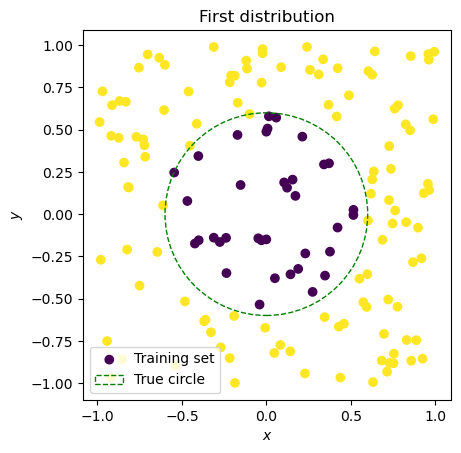

In [3]:
fig, ax = plt.subplots(1)
ax.set_title(f"First distribution")
ax.scatter(*pts.T, c=colors, label="Training set")
true_circle = plt.Circle((0,0), 0.6, fill=False, color='green', linestyle='dashed', label="True circle")
ax.add_patch(true_circle)
ax.set_xlabel(f"$x$")
ax.set_ylabel(f"$y$")
ax.set_aspect(1)
ax.legend()
plt.show()

### Visualize SVM behavior

In [4]:
# Again, we only use the scikit-learn SVM for the sake of visualization
quad_svm = sklearn.svm.SVC(kernel="poly", degree=2, random_state=1)
# quad_svm = sklearn.svm.SVC(kernel="rbf", random_state=1) # rbf would likely also work
quad_svm.fit(pts, colors)
quad_svm_train_preds = quad_svm.predict(pts)

In [5]:
grid_x_count = 200
grid_y_count = 201
grid_x = np.linspace(-1, 1, grid_x_count, endpoint=True)
grid_y = np.linspace(-1, 1, grid_y_count, endpoint=True)

grid_xy = np.array(np.meshgrid(grid_x, grid_y)).T
quad_svm_grid_preds = quad_svm.predict(
    grid_xy.reshape(grid_x_count*grid_y_count, 2)
).reshape(grid_x_count, grid_y_count)

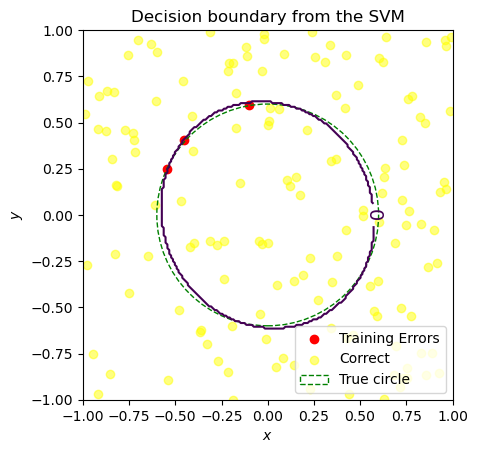

In [6]:
fig, ax = plt.subplots(1)
ax.set_title(f"Decision boundary from the SVM")

contour_set = ax.contour(grid_x, grid_y, 2*quad_svm_grid_preds.T-1, levels=[0])
plt.clabel(contour_set, inline=1, fontsize=14)
# contour_set.collections[0].set_label(f"Decision boundary")
ax.scatter(*pts[colors!=quad_svm_train_preds].T, color='red', label="Training Errors")
ax.scatter(*pts[colors==quad_svm_train_preds].T, color='yellow', alpha=0.5, label="Correct")
true_circle = plt.Circle((0,0), 0.6, fill=False, color='green', linestyle='dashed', label="True circle")
ax.add_patch(true_circle)
ax.set_xlabel(f"$x$")
ax.set_ylabel(f"$y$")
ax.set_aspect(1)
ax.legend(loc="lower right")
plt.show()

## Look at the second set of points

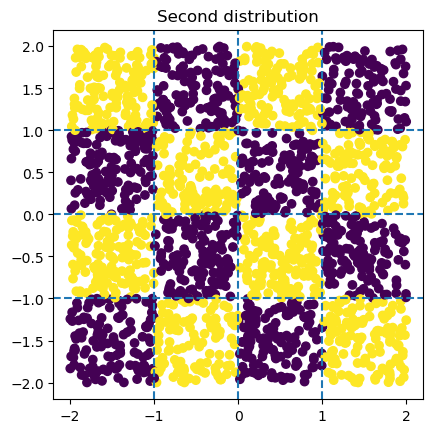

In [7]:
fig, ax = plt.subplots(1)
ax.set_title(f"Second distribution")
ax.scatter(*pts2.T, c=colors2)
for i in range(3):
    ax.axvline(-1+i, linestyle='dashed')
    ax.axhline(-1+i, linestyle='dashed')
ax.set_aspect(1)
plt.show()

In [8]:
# Again, we only use the scikit-learn SVM for the sake of visualization
rbf_svm = sklearn.svm.SVC(kernel="rbf", C=1e4, random_state=1) # Reduce regularization
rbf_svm.fit(pts2, colors2)

rbf_svm_train_preds = rbf_svm.predict(pts2)

In [9]:
grid2_x_count = 103
grid2_y_count = 106
grid2_x = np.linspace(-2, 2, grid2_x_count, endpoint=True)
grid2_y = np.linspace(-2, 2, grid2_y_count, endpoint=True)

grid2_xy = np.array(np.meshgrid(grid2_x, grid2_y)).T
rbf_svm_grid_preds = rbf_svm.predict(
    grid2_xy.reshape(grid2_x_count*grid2_y_count, 2)
).reshape(grid2_x_count, grid2_y_count)

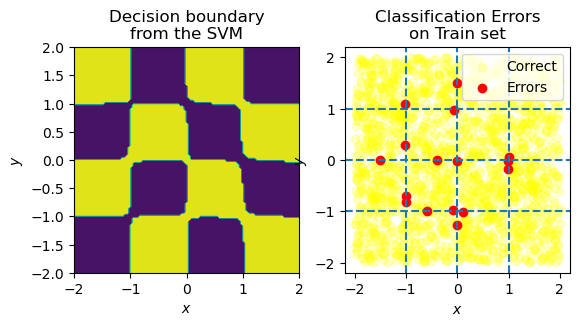

In [10]:
fig, axes = plt.subplots(1, 2)
ax0, ax1 = axes
ax0.set_title(f"Decision boundary\nfrom the SVM")
ax0.contourf(grid2_x, grid2_y, rbf_svm_grid_preds.T, levels=10)
ax0.set_xlabel(f"$x$")
ax0.set_ylabel(f"$y$")
ax0.set_aspect(1)

ax1.set_title(f"Classification Errors\non Train set")
for i in range(3):
    ax1.axvline(-1+i, linestyle='dashed')
    ax1.axhline(-1+i, linestyle='dashed')
ax1.scatter(*pts2[colors2==rbf_svm_train_preds].T, color='yellow', alpha=0.2, label="Correct")
ax1.scatter(*pts2[colors2!=rbf_svm_train_preds].T, color='red', label="Errors")
# ax1.contour(grid2_x, grid2_y, rbf_svm_grid_preds.T, levels=10)
ax1.set_xlabel(f"$x$")
ax1.set_ylabel(f"$y$")
ax1.set_aspect(1)
ax1.legend(loc="upper right")
plt.show()